In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
plt.rc('figure', figsize=(10, 5))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
votes_2020 = pd.read_excel('/content/drive/MyDrive/CP project/Project/Cleaned Datasets/merged_data.xlsx')
votes_2020

,state_po,county,DEMOCRAT,GREEN,LIBERTARIAN,OTHER,REPUBLICAN,unemp rate,"Poverty Percent, All Ages",Real GDP
0,SC,abbeville,4101,23,88,6,8215,6.5,15.3,572455
1,VA,accomack,7578,0,188,24,9172,6.7,17.6,1785338
2,ID,ada,120539,0,5310,2841,130699,5.5,7.7,29310868
3,OK,adair,1387,0,62,74,5585,6.0,22.3,395223
4,MO,adair,3710,43,157,13,6413,5.1,17.9,785869
...,...,...,...,...,...,...,...,...,...,...
2963,CO,yuma,785,2,52,35,4107,2.6,11.5,400574
2964,AZ,yuma,32210,0,1137,0,36534,17.1,15.2,7571543
2965,TX,zapata,1826,4,11,0,2033,12.3,24.6,551863
2966,TX,zavala,2864,12,13,0,1490,14.3,27.2,569285


In [9]:
selected_columns = votes_2020.drop(["unemp rate", "Poverty Percent, All Ages"], axis=1)
selected_columns


,state_po,county,DEMOCRAT,GREEN,LIBERTARIAN,OTHER,REPUBLICAN,Real GDP
0,SC,abbeville,4101,23,88,6,8215,572455
1,VA,accomack,7578,0,188,24,9172,1785338
2,ID,ada,120539,0,5310,2841,130699,29310868
3,OK,adair,1387,0,62,74,5585,395223
4,MO,adair,3710,43,157,13,6413,785869
...,...,...,...,...,...,...,...,...
2963,CO,yuma,785,2,52,35,4107,400574
2964,AZ,yuma,32210,0,1137,0,36534,7571543
2965,TX,zapata,1826,4,11,0,2033,551863
2966,TX,zavala,2864,12,13,0,1490,569285


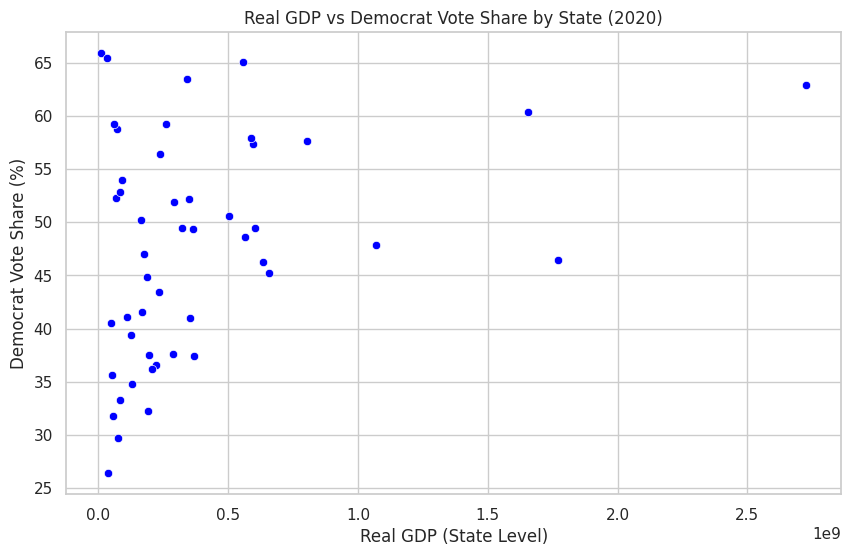

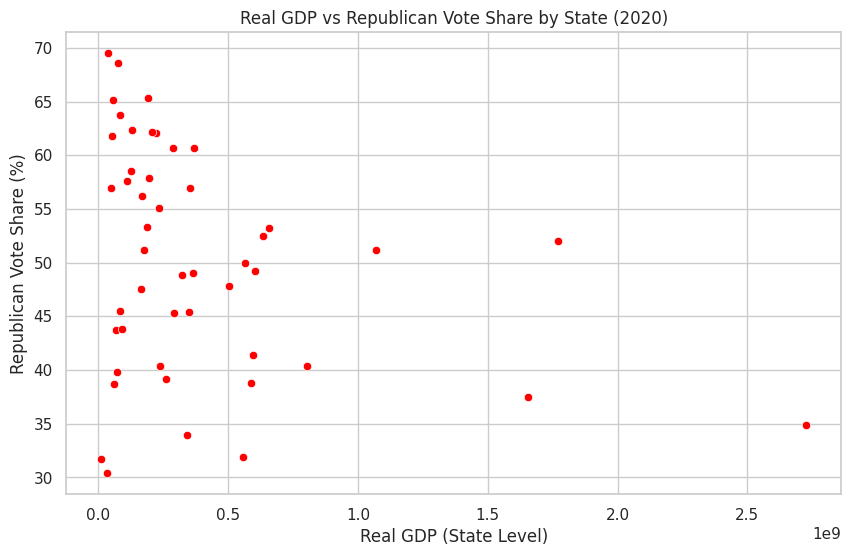

In [10]:

# Aggregating the data by state
state_data = selected_columns.groupby('state_po')[['DEMOCRAT', 'GREEN', 'LIBERTARIAN', 'OTHER', 'REPUBLICAN', 'Real GDP']].sum()

# Calculating the total number of votes per state
state_data['Total Votes'] = state_data[['DEMOCRAT', 'GREEN', 'LIBERTARIAN', 'OTHER', 'REPUBLICAN']].sum(axis=1)

# Calculating vote share for each party (percentage of total votes per state)
for party in ['DEMOCRAT', 'GREEN', 'LIBERTARIAN', 'OTHER', 'REPUBLICAN']:
    state_data[party + '_share'] = (state_data[party] / state_data['Total Votes']) * 100

# Visualizing the relationship between Real GDP and the vote share of each party
# Setting up seaborn style for better visuals
sns.set(style="whitegrid")

# Plotting Real GDP vs DEMOCRAT vote share
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real GDP', y='DEMOCRAT_share', data=state_data, color='blue')
plt.title('Real GDP vs Democrat Vote Share by State (2020)')
plt.xlabel('Real GDP (State Level)')
plt.ylabel('Democrat Vote Share (%)')
plt.show()

# Plotting Real GDP vs REPUBLICAN vote share
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real GDP', y='REPUBLICAN_share', data=state_data, color='red')
plt.title('Real GDP vs Republican Vote Share by State (2020)')
plt.xlabel('Real GDP (State Level)')
plt.ylabel('Republican Vote Share (%)')
plt.show()


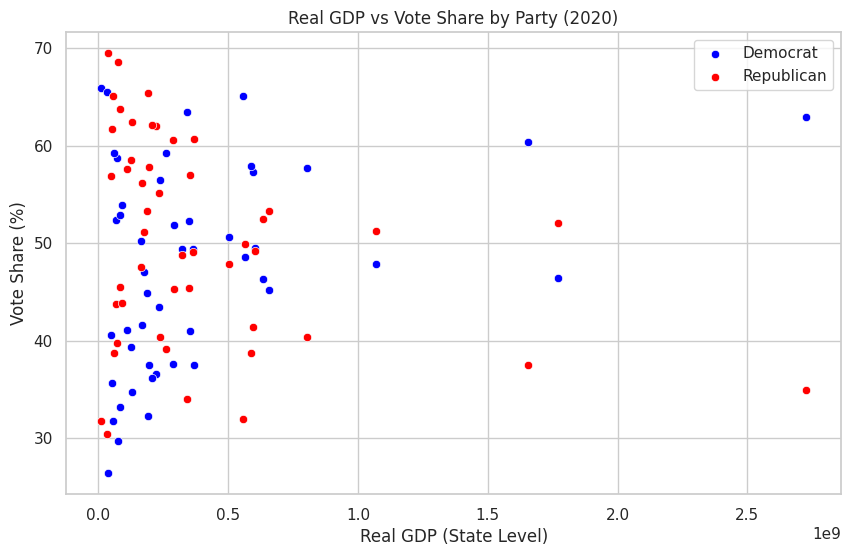

In [11]:
# Plotting Real GDP against vote share for each party
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real GDP', y='DEMOCRAT_share', data=state_data, color='blue', label='Democrat')
sns.scatterplot(x='Real GDP', y='REPUBLICAN_share', data=state_data, color='red', label='Republican')
plt.title('Real GDP vs Vote Share by Party (2020)')
plt.xlabel('Real GDP (State Level)')
plt.ylabel('Vote Share (%)')
plt.legend()
plt.show()


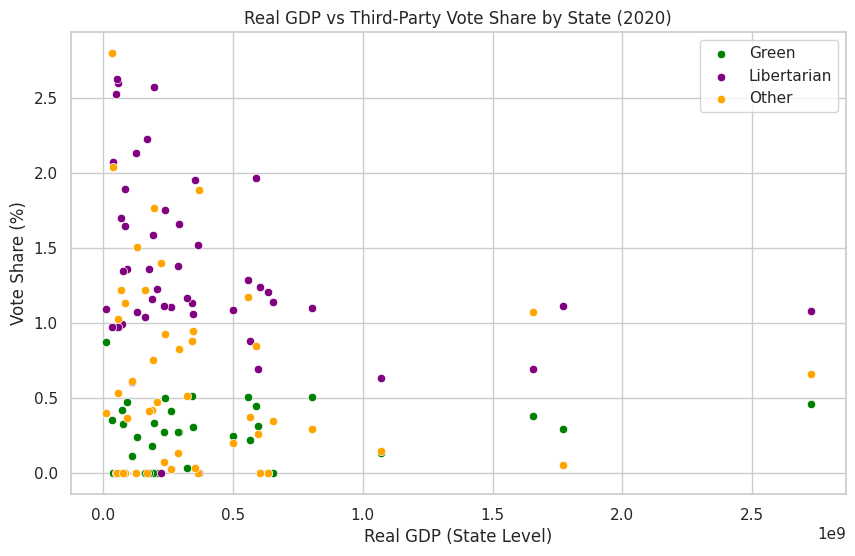

In [12]:
# Visualizing relationship between Real GDP and vote share for smaller parties
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real GDP', y='GREEN_share', data=state_data, color='green', label='Green')
sns.scatterplot(x='Real GDP', y='LIBERTARIAN_share', data=state_data, color='purple', label='Libertarian')
sns.scatterplot(x='Real GDP', y='OTHER_share', data=state_data, color='orange', label='Other')
plt.title('Real GDP vs Third-Party Vote Share by State (2020)')
plt.xlabel('Real GDP (State Level)')
plt.ylabel('Vote Share (%)')
plt.legend()
plt.show()


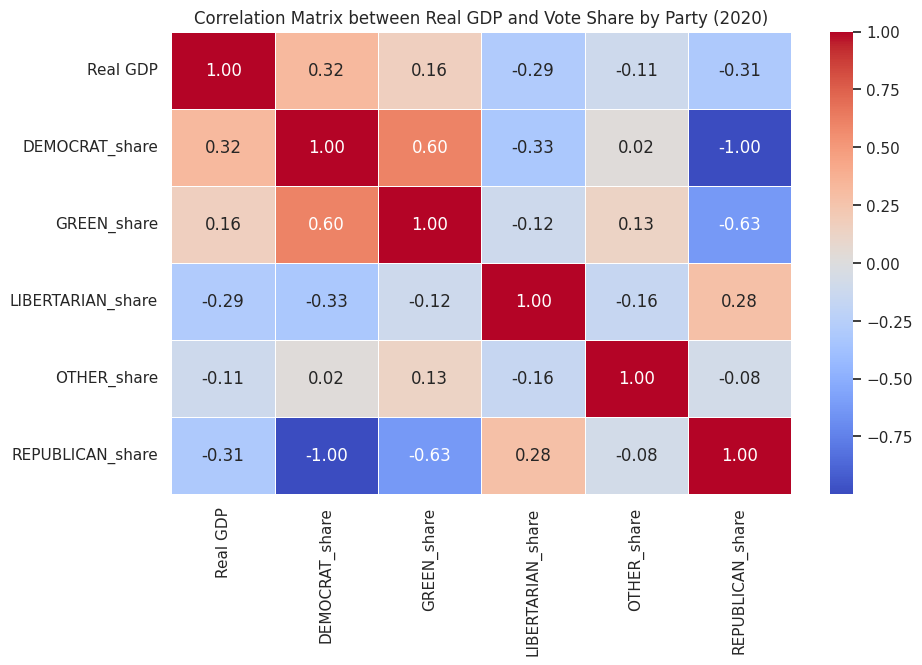

In [13]:
# Computing the correlation matrix
correlation_matrix = state_data[['Real GDP', 'DEMOCRAT_share', 'GREEN_share', 'LIBERTARIAN_share', 'OTHER_share', 'REPUBLICAN_share']].corr()

# Plotting heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix between Real GDP and Vote Share by Party (2020)')
plt.show()


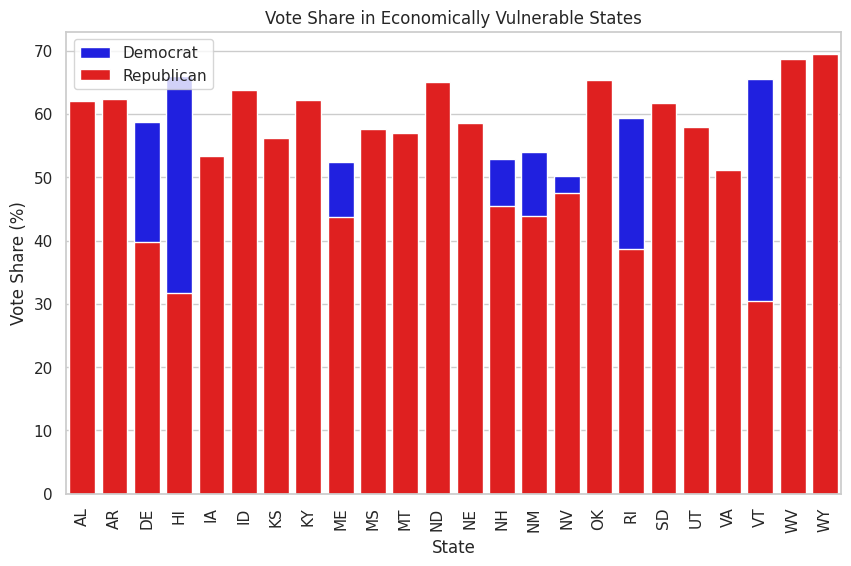

In [14]:
# Create a flag for economically vulnerable states
state_data['economically_vulnerable'] = state_data['Real GDP'] < state_data['Real GDP'].median()

# Compare vote shares for economically vulnerable states
vulnerable_states = state_data[state_data['economically_vulnerable']]

plt.figure(figsize=(10, 6))
sns.barplot(x='state_po', y='DEMOCRAT_share', data=vulnerable_states, color='blue', label='Democrat')
sns.barplot(x='state_po', y='REPUBLICAN_share', data=vulnerable_states, color='red', label='Republican')
plt.title('Vote Share in Economically Vulnerable States')
plt.xlabel('State')
plt.ylabel('Vote Share (%)')
plt.xticks(rotation=90)
plt.legend()
plt.show()


States with lower Real GDP are often considered more vulnerable because their economies are smaller, meaning they might be more sensitive to external economic changes, such as global recessions or shifts in key industries.